# **Bibliotecas**

In [1]:
%pip install tensorflow
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     -------------------------------------- 430.5/430.5 KB 3.4 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
     ---------------------------------------- 4.3/4.3 MB 8.8 MB/s eta 0:00:00
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (2

You should consider upgrading via the 'c:\Users\ricar\Documents\GitHub\Pessoal\tcc\python-tcc\training\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached fonttools-4.42.1-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
  Using cached Pillow-10.0.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ricar\Documents\GitHub\Pessoal\tcc\python-tcc\training\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 11.1/11.1 MB 10.4 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     -------------------------------------- 502.5/502.5 KB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ricar\Documents\GitHub\Pessoal\tcc\python-tcc\training\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\ricar\Documents\GitHub\Pessoal\tcc\python-tcc\training\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 9.2/9.2 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ricar\Documents\GitHub\Pessoal\tcc\python-tcc\training\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


# **Carregar Dataset**

## LIBRAS

In [43]:
import os

# input_shape = (64, 64, 3)
input_shape = (75, 75, 3)  # InceptionV3 input size

train_path = f"../datasets/libras/{input_shape[0]}x{input_shape[1]}/train/"
test_path  = f"../datasets/libras/{input_shape[0]}x{input_shape[1]}/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
../datasets/libras/75x75/train/A contains 1615 images
../datasets/libras/75x75/train/B contains 1615 images
../datasets/libras/75x75/train/C contains 1615 images
../datasets/libras/75x75/train/D contains 1615 images
../datasets/libras/75x75/train/E contains 1615 images
../datasets/libras/75x75/train/F contains 1615 images
../datasets/libras/75x75/train/G contains 1615 images
../datasets/libras/75x75/train/I contains 1615 images
../datasets/libras/75x75/train/L contains 1615 images
../datasets/libras/75x75/train/M contains 1615 images
../datasets/libras/75x75/train/N contains 1615 images
../datasets/libras/75x75/train/O contains 1615 images
../datasets/libras/75x75/train/P contains 1615 images
../datasets/libras/75x75/train/Q contains 1615 images
../datasets/libras/75x75/train/R contains 1615 images
../datasets/libras/75x75/train/S contains 1615 images
../datasets/libras/75

## Pessoal

In [46]:
import os

# input_shape = (64, 64, 3)
input_shape = (75, 75, 3)  # InceptionV3 input size

train_path = f"../datasets/personal/clean/{input_shape[0]}x{input_shape[1]}/train/"
test_path  = f"../datasets/personal/clean/{input_shape[0]}x{input_shape[1]}/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
../datasets/personal/clean/75x75/train/A contains 300 images
../datasets/personal/clean/75x75/train/B contains 300 images
../datasets/personal/clean/75x75/train/C contains 300 images
../datasets/personal/clean/75x75/train/D contains 300 images
../datasets/personal/clean/75x75/train/E contains 300 images
../datasets/personal/clean/75x75/train/F contains 300 images
../datasets/personal/clean/75x75/train/G contains 300 images
../datasets/personal/clean/75x75/train/I contains 300 images
../datasets/personal/clean/75x75/train/L contains 300 images
../datasets/personal/clean/75x75/train/M contains 300 images
../datasets/personal/clean/75x75/train/N contains 300 images
../datasets/personal/clean/75x75/train/O contains 300 images
../datasets/personal/clean/75x75/train/P contains 300 images
../datasets/personal/clean/75x75/train/Q contains 300 images
../datasets/personal/clean/75x7

# **Carregar modelo**

## InceptionV3

Found 1260 images belonging to 21 classes.
Found 4200 images belonging to 21 classes.


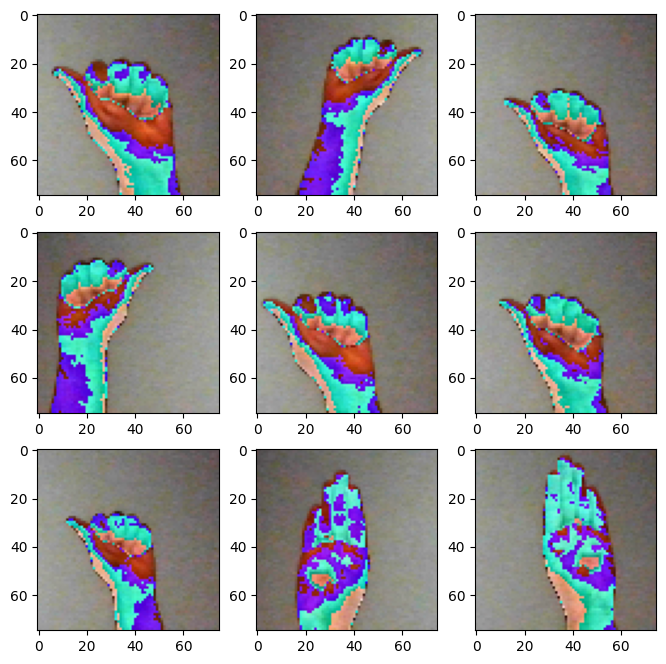

In [47]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
import matplotlib.pyplot as plt

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 123

## Data augmentation and preprocessing
# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
)

test_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
validation_samples = validation_generator.samples
test_samples = test_generator.samples

# Visualize Examples
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = test_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)

plt.show()

## Model
# filepath = "./InceptionV3/benchmark/libras-libras/"
# filepath = "./InceptionV3/benchmark/libras-personal/"
# filepath = "./InceptionV3/benchmark/personal-libras/"
filepath = "./InceptionV3/benchmark/personal-personal/"
# model = load_model(f"./InceptionV3/libras/inceptionv3_model.h5")
model = load_model(f"./InceptionV3/personal/inceptionv3_model.h5")
# cm_title = '[InceptionV3] Matriz de Confusão - Modelo LIBRAS - Teste LIBRAS'
# cm_title = '[InceptionV3] Matriz de Confusão - Modelo LIBRAS - Teste Pessoal'
# cm_title = '[InceptionV3] Matriz de Confusão - Modelo Pessoal - Teste LIBRAS'
cm_title = '[InceptionV3] Matriz de Confusão - Modelo Pessoal - Teste Pessoal'

## ResNet50

Found 1860 images belonging to 21 classes.
Found 5200 images belonging to 21 classes.


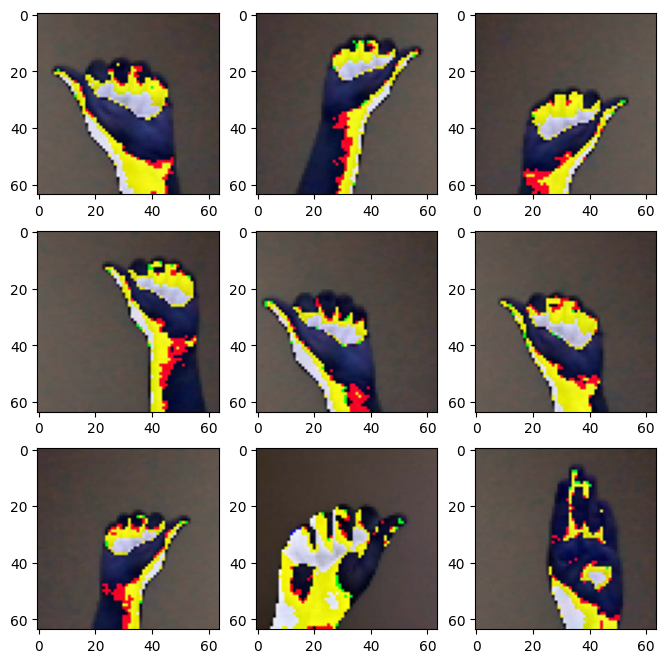

In [13]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model
import matplotlib.pyplot as plt

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 10

## Data augmentation and preprocessing
# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    rescale=1./255,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rescale=1./255,
)
test_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
validation_samples = validation_generator.samples
test_samples = test_generator.samples


# Visualize Examples
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = test_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)

plt.show()

## Model
# filepath = "./ResNet50/benchmark/libras-libras/"
# filepath = "./ResNet50/benchmark/libras-personal/"
# filepath = "./ResNet50/benchmark/personal-libras/"
filepath = "./ResNet50/benchmark/personal-personal/"
# model = load_model(f"./ResNet50/libras/resnet50_model.h5")
model = load_model(f"./ResNet50/personal/resnet50_model.h5")
# cm_title = '[ResNet50] Matriz de Confusão - Modelo LIBRAS - Teste LIBRAS'
# cm_title = '[ResNet50] Matriz de Confusão - Modelo LIBRAS - Teste Pessoal'
# cm_title = '[ResNet50] Matriz de Confusão - Modelo Pessoal - Teste LIBRAS'
cm_title = '[ResNet50] Matriz de Confusão - Modelo Pessoal - Teste Pessoal'

## MobileNet

Found 1860 images belonging to 21 classes.
Found 5200 images belonging to 21 classes.


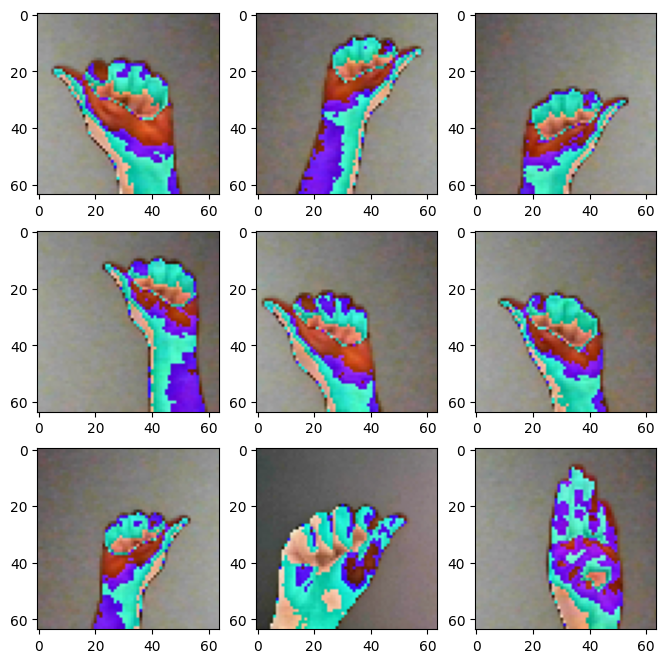

In [34]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import load_model
import matplotlib.pyplot as plt

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 10

## Data augmentation and preprocessing
# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
)
test_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
validation_samples = validation_generator.samples
test_samples = test_generator.samples


# Visualize Examples
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = test_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)

plt.show()

## Model
# filepath = "./MobileNet/benchmark/libras-libras/"
# filepath = "./MobileNet/benchmark/libras-personal/"
# filepath = "./MobileNet/benchmark/personal-libras/"
filepath = "./MobileNet/benchmark/personal-personal/"
# model = load_model(f"./MobileNet/libras/mobilenet_model.h5")
model = load_model(f"./MobileNet/personal/mobilenet_model.h5")
# cm_title = '[MobileNet] Matriz de Confusão - Modelo LIBRAS - Teste LIBRAS'
# cm_title = '[MobileNet] Matriz de Confusão - Modelo LIBRAS - Teste Pessoal'
# cm_title = '[MobileNet] Matriz de Confusão - Modelo Pessoal - Teste LIBRAS'
cm_title = '[MobileNet] Matriz de Confusão - Modelo Pessoal - Teste Pessoal'

# **Testes**

## Funções

In [3]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def classification_report_csv(report):
  report_data = []
  lines = report.split('\n')
  for line in lines[2:-3]:
      row = {}
      row_data = [d for d in line.split(' ') if d!='']
      if (len(row_data) == 5):
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
  dataframe = pd.DataFrame.from_dict(report_data)
  dataframe.to_csv(f'{filepath}classification_report.csv', index = False)

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'{filepath}confusion_matrix.png')

## Reports

40/40 [==============================] - 4s 80ms/step - loss: 0.4888 - accuracy: 0.8690
Validation loss: 0.48880746960639954
Validation accuracy: 0.8690476417541504
132/132 [==============================] - 11s 81ms/step - loss: 0.5109 - accuracy: 0.8602
Test loss: 0.51091068983078
Test accuracy: 0.8602380752563477
132/132 [==============================] - 13s 91ms/step
Classification Report
              precision    recall  f1-score   support

           A       0.92      0.99      0.95       200
           B       0.98      0.99      0.99       200
           C       0.97      0.98      0.98       200
           D       0.94      0.62      0.75       200
           E       1.00      0.99      1.00       200
           F       0.97      0.70      0.81       200
           G       0.75      0.85      0.80       200
           I       0.68      0.88      0.77       200
           L       0.96      0.97      0.96       200
           M       0.83      0.76      0.79       200
        

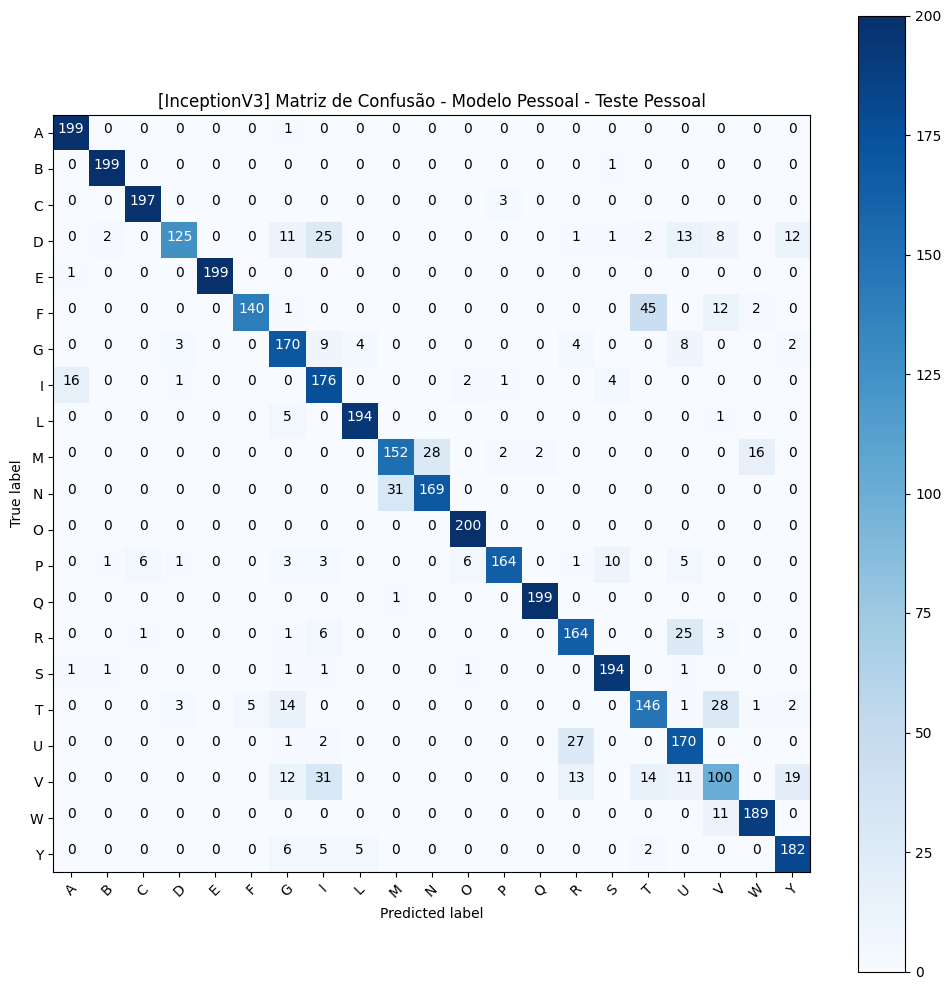

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

## Validation
v_score = model.evaluate(validation_generator)
print('Validation loss:', v_score[0])
print('Validation accuracy:', v_score[1])

# Test
t_score = model.evaluate(test_generator)
print('Test loss:', t_score[0])
print('Test accuracy:', t_score[1])

with open(f'{filepath}model_evaluation.txt', "w") as f:
    f.write(f'Validation loss: {v_score[0]}\n')
    f.write(f'Validation accuracy: {v_score[1]}\n')
    f.write(f'Test loss: {t_score[0]}\n')
    f.write(f'Test accuracy: {t_score[1]}')

## Some reports
# On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title=cm_title)

# Classification Report
print('Classification Report')
report = classification_report(test_generator.classes, y_pred, target_names=target_names)
classification_report_csv(report)
print(report)